# Support Vector Machine 3
(C) 2017-2019 by Damir Cavar - Creative Commons Attribution-ShareAlike 4.0 International License (CA BY-SA 4.0); portions taken from the referenced sources.
* https://pythonprogramming.net/support-vector-machine-svm-example-tutorial-scikit-learn-python/

### Import libraries

In [1]:
import pprint as pp
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import svm

### Set global variables

In [2]:
global example_digit, test_digit

### Load data

From https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html  

Each datapoint is a 8x8 image of a digit
* Classes: 10 (digits 0 to 9)
* Samples per class: ~180
* Samples total: 1797
* Dimensionality: 64
* Features: integers 0-16

In [3]:
digits = datasets.load_digits()

In [4]:
print(digits.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

### Examine data

In [5]:
# Each array represents the hexadecimal bitmap of a digit's image
print(digits.data)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]


In [6]:
print(digits.feature_names)

['pixel_0_0', 'pixel_0_1', 'pixel_0_2', 'pixel_0_3', 'pixel_0_4', 'pixel_0_5', 'pixel_0_6', 'pixel_0_7', 'pixel_1_0', 'pixel_1_1', 'pixel_1_2', 'pixel_1_3', 'pixel_1_4', 'pixel_1_5', 'pixel_1_6', 'pixel_1_7', 'pixel_2_0', 'pixel_2_1', 'pixel_2_2', 'pixel_2_3', 'pixel_2_4', 'pixel_2_5', 'pixel_2_6', 'pixel_2_7', 'pixel_3_0', 'pixel_3_1', 'pixel_3_2', 'pixel_3_3', 'pixel_3_4', 'pixel_3_5', 'pixel_3_6', 'pixel_3_7', 'pixel_4_0', 'pixel_4_1', 'pixel_4_2', 'pixel_4_3', 'pixel_4_4', 'pixel_4_5', 'pixel_4_6', 'pixel_4_7', 'pixel_5_0', 'pixel_5_1', 'pixel_5_2', 'pixel_5_3', 'pixel_5_4', 'pixel_5_5', 'pixel_5_6', 'pixel_5_7', 'pixel_6_0', 'pixel_6_1', 'pixel_6_2', 'pixel_6_3', 'pixel_6_4', 'pixel_6_5', 'pixel_6_6', 'pixel_6_7', 'pixel_7_0', 'pixel_7_1', 'pixel_7_2', 'pixel_7_3', 'pixel_7_4', 'pixel_7_5', 'pixel_7_6', 'pixel_7_7']


In [7]:
print(digits.target)

[0 1 2 ... 8 9 8]


In [8]:
print(digits.target_names)

[0 1 2 3 4 5 6 7 8 9]


In [9]:
# Print the hexadecimal bitmap of an example digit's image
example_digit = 50     # 50 is the array index (i.e. the 51st element in the array)
print(digits.data[example_digit])

[ 0.  0.  0.  5. 14. 12.  2.  0.  0.  0.  7. 15.  8. 14.  4.  0.  0.  0.
  6.  2.  3. 13.  1.  0.  0.  0.  0.  1. 13.  4.  0.  0.  0.  0.  1. 11.
  9.  0.  0.  0.  0.  8. 16. 13.  0.  0.  0.  0.  0.  5. 14. 16. 11.  2.
  0.  0.  0.  0.  0.  6. 12. 13.  3.  0.]


<Figure size 432x288 with 0 Axes>

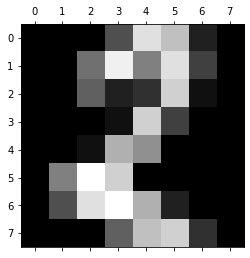

In [10]:
# Print the image of the same example digit
#  matplotlib.pyplot.matshow displays array as a matrix
plt.gray()
plt.matshow(digits.images[example_digit])
plt.show()

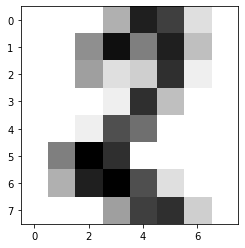

In [11]:
# Print the image of the same example digit using a different function
#  matplotlib.pyplot.imshow displays array as a 2D image
plt.imshow(digits.images[example_digit], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [12]:
# Print the target value for the same example digit
print(digits.target[example_digit])

2


### Separate independent and dependent variables

In [13]:
# Implicitly, leave out the last 10 digits for testing
X,y = digits.data[:-10], digits.target[:-10]

### Instantiate SVC model with default hyperparameters

In [14]:
classifier = svm.SVC()

In [15]:
pp.pprint(classifier.get_params())

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}


### Train SVC model

In [16]:
%%time

classifier.fit(X,y)

CPU times: user 55.5 ms, sys: 3.2 ms, total: 58.7 ms
Wall time: 55.5 ms


SVC()

### Instantiate SVC model with a lower gamma

In [17]:
# The hyperparameter gamma controls speed vs accuracy tradeoff
#  The higher the gamma, the faster the training but the lower the accuracy
classifier = svm.SVC(gamma=0.00001)

### Train updated SVC model

In [18]:
%%time

classifier.fit(X,y)

CPU times: user 171 ms, sys: 1.82 ms, total: 172 ms
Wall time: 172 ms


SVC(gamma=1e-05)

### Make predictions using trained model

In [19]:
test_digit = -5     # -5 is the fifth element from the end of the test set

In [20]:
# Test classifier on one of the test datapoints that was left out from the training set
print(classifier.predict(digits.data[test_digit].reshape(1,-1)))

[9]


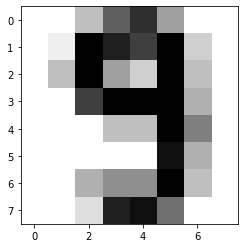

In [21]:
plt.imshow(digits.images[test_digit], cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

In [22]:
print(digits.target[test_digit])

9
